In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from collections import Counter
import re

In [88]:
# Load data
data = pd.read_csv('dataset.csv')

# Menampilkan keseluruhan data
data.head(10)

,Name,Handle,Timestamp,Verified,Content,Comments,Retweets,Likes,Analytics,Tags,Mentions,Emojis,Profile Image,Tweet Link,Tweet ID
0,EuroPost Agency,@EuroPostAgency,2024-10-13T18:30:00.000Z,True,"Indonesia's Prabowo Mulls Corporate Tax Cut, A...",0,0,0,0,['#Europost'],[],[],https://pbs.twimg.com/profile_images/172299259...,https://x.com/EuroPostAgency/status/1845532455...,tweet_id:1845532455941599735
1,𝗕𝗮𝗵𝗹𝘂𝗹 𝗠𝘂𝗹𝘆𝗼𝗻𝗼,@LelePecel150424,2024-10-13T18:29:56.000Z,False,Bagus aja si.\nSepanjang produk jurnalistiknya...,0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/182902314...,https://x.com/LelePecel150424/status/184553244...,tweet_id:1845532440024265121
2,Dika,@Dika49710609,2024-10-13T18:29:30.000Z,False,Kenyataannya ni si bahlul masuk kabinet nya pr...,0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/154743849...,https://x.com/Dika49710609/status/184553233006...,tweet_id:1845532330066370815
3,Auni Shafiyah,@auni_shafiyahh,2024-10-13T18:29:13.000Z,False,Prabowo hadirkan drone untuk menjaga Papua den...,0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/169927806...,https://x.com/auni_shafiyahh/status/1845532258...,tweet_id:1845532258964582718
4,Wonge dewek,@Rakyatpantura,2024-10-13T18:29:06.000Z,False,Ngomongin . Paloh . Mega . Cak Imin . Sby .,0,0,0,2,[],[],[],https://pbs.twimg.com/profile_images/137490770...,https://x.com/Rakyatpantura/status/18455322300...,tweet_id:1845532230028030098
5,Jaya Kuswoyo,@jaya_kuswoyo2,2024-10-13T18:28:55.000Z,False,Terima kasih Prabowo-Gibran Program ini sangat...,0,0,0,0,['#MakanBergiziUntukBangsa'],[],[],https://pbs.twimg.com/profile_images/170111991...,https://x.com/jaya_kuswoyo2/status/18455321814...,tweet_id:1845532181411893392
6,Suripto Bambang,@suripto_bamban,2024-10-13T18:28:52.000Z,False,"Langkah tepat Prabowo-Gibran, makan bergizi gr...",0,0,0,0,['#MakanBergiziUntukBangsa'],[],[],https://pbs.twimg.com/profile_images/170369280...,https://x.com/suripto_bamban/status/1845532171...,tweet_id:1845532171278442843
7,¥ a u m e n e e r,@mamagemoybiasa,2024-10-13T18:28:07.000Z,False,"terimakasih Bapak Jokowi, selamad mengemban tu...",0,0,0,2,[],['@kompascom'],[],https://pbs.twimg.com/profile_images/149308520...,https://x.com/mamagemoybiasa/status/1845531982...,tweet_id:1845531982215983582
8,redcamel,@322redcamel,2024-10-13T18:26:47.000Z,False,Yg bela penjajah tanda nya sakit jiwa itu bg,0,0,0,2,[],[],[],https://pbs.twimg.com/profile_images/172776975...,https://x.com/322redcamel/status/1845531645434...,tweet_id:1845531645434339452
9,EuroPost Agency,@EuroPostAgency,2024-10-13T18:30:00.000Z,True,"Indonesia's Prabowo Mulls Corporate Tax Cut, A...",0,0,0,0,['#Europost'],[],[],https://pbs.twimg.com/profile_images/172299259...,https://x.com/EuroPostAgency/status/1845532455...,tweet_id:1845532455941599735


In [55]:
# Menampilkan jumlah data yang diperoleh
print(len(data))

1905


In [56]:
# Menampilkan 10 dataframe awal
data.head(10)

,Name,Handle,Timestamp,Verified,Content,Comments,Retweets,Likes,Analytics,Tags,Mentions,Emojis,Profile Image,Tweet Link,Tweet ID
0,EuroPost Agency,@EuroPostAgency,2024-10-13T18:30:00.000Z,True,"Indonesia's Prabowo Mulls Corporate Tax Cut, A...",0,0,0,0,['#Europost'],[],[],https://pbs.twimg.com/profile_images/172299259...,https://x.com/EuroPostAgency/status/1845532455...,tweet_id:1845532455941599735
1,𝗕𝗮𝗵𝗹𝘂𝗹 𝗠𝘂𝗹𝘆𝗼𝗻𝗼,@LelePecel150424,2024-10-13T18:29:56.000Z,False,Bagus aja si.\nSepanjang produk jurnalistiknya...,0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/182902314...,https://x.com/LelePecel150424/status/184553244...,tweet_id:1845532440024265121
2,Dika,@Dika49710609,2024-10-13T18:29:30.000Z,False,Kenyataannya ni si bahlul masuk kabinet nya pr...,0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/154743849...,https://x.com/Dika49710609/status/184553233006...,tweet_id:1845532330066370815
3,Auni Shafiyah,@auni_shafiyahh,2024-10-13T18:29:13.000Z,False,Prabowo hadirkan drone untuk menjaga Papua den...,0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/169927806...,https://x.com/auni_shafiyahh/status/1845532258...,tweet_id:1845532258964582718
4,Wonge dewek,@Rakyatpantura,2024-10-13T18:29:06.000Z,False,Ngomongin . Paloh . Mega . Cak Imin . Sby .,0,0,0,2,[],[],[],https://pbs.twimg.com/profile_images/137490770...,https://x.com/Rakyatpantura/status/18455322300...,tweet_id:1845532230028030098
5,Jaya Kuswoyo,@jaya_kuswoyo2,2024-10-13T18:28:55.000Z,False,Terima kasih Prabowo-Gibran Program ini sangat...,0,0,0,0,['#MakanBergiziUntukBangsa'],[],[],https://pbs.twimg.com/profile_images/170111991...,https://x.com/jaya_kuswoyo2/status/18455321814...,tweet_id:1845532181411893392
6,Suripto Bambang,@suripto_bamban,2024-10-13T18:28:52.000Z,False,"Langkah tepat Prabowo-Gibran, makan bergizi gr...",0,0,0,0,['#MakanBergiziUntukBangsa'],[],[],https://pbs.twimg.com/profile_images/170369280...,https://x.com/suripto_bamban/status/1845532171...,tweet_id:1845532171278442843
7,¥ a u m e n e e r,@mamagemoybiasa,2024-10-13T18:28:07.000Z,False,"terimakasih Bapak Jokowi, selamad mengemban tu...",0,0,0,2,[],['@kompascom'],[],https://pbs.twimg.com/profile_images/149308520...,https://x.com/mamagemoybiasa/status/1845531982...,tweet_id:1845531982215983582
8,redcamel,@322redcamel,2024-10-13T18:26:47.000Z,False,Yg bela penjajah tanda nya sakit jiwa itu bg,0,0,0,2,[],[],[],https://pbs.twimg.com/profile_images/172776975...,https://x.com/322redcamel/status/1845531645434...,tweet_id:1845531645434339452
9,EuroPost Agency,@EuroPostAgency,2024-10-13T18:30:00.000Z,True,"Indonesia's Prabowo Mulls Corporate Tax Cut, A...",0,0,0,0,['#Europost'],[],[],https://pbs.twimg.com/profile_images/172299259...,https://x.com/EuroPostAgency/status/1845532455...,tweet_id:1845532455941599735


In [57]:
# Melihat info dari dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1891 non-null   object
 1   Handle         1905 non-null   object
 2   Timestamp      1905 non-null   object
 3   Verified       1905 non-null   bool  
 4   Content        1850 non-null   object
 5   Comments       1905 non-null   int64 
 6   Retweets       1905 non-null   int64 
 7   Likes          1905 non-null   object
 8   Analytics      1905 non-null   object
 9   Tags           1905 non-null   object
 10  Mentions       1905 non-null   object
 11  Emojis         1905 non-null   object
 12  Profile Image  1905 non-null   object
 13  Tweet Link     1905 non-null   object
 14  Tweet ID       1905 non-null   object
dtypes: bool(1), int64(2), object(12)
memory usage: 210.3+ KB


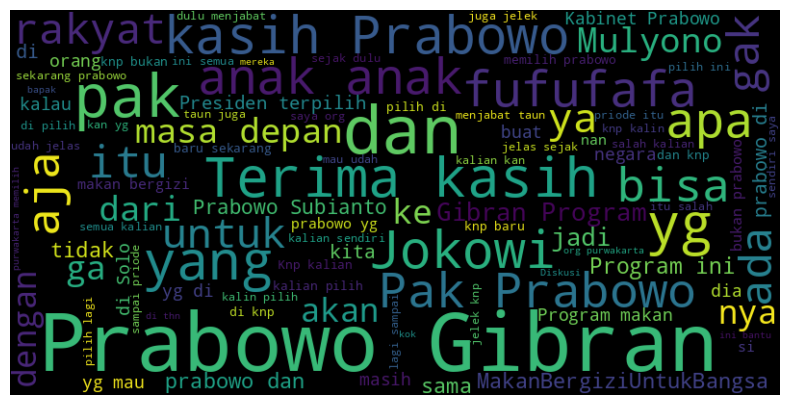

In [58]:
data['Content'] = data['Content'].apply(lambda x: str(x))

# Menampilkan wordcloud
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(data['Content']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

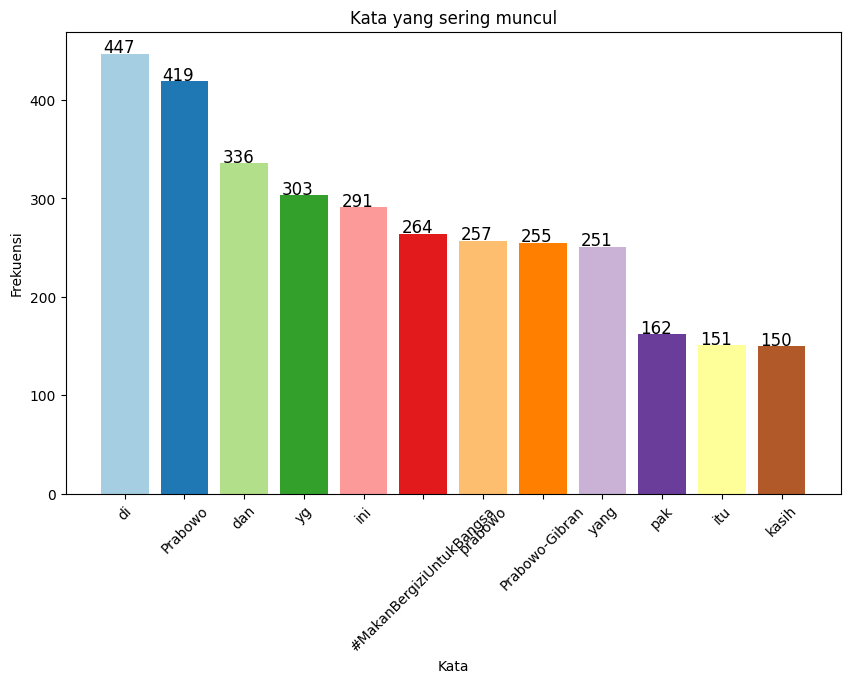

In [59]:
text = ' '.join(data['Content'])
words = text.split()
word_counts = Counter(words)
top_words = word_counts.most_common(12)
words, counts = zip(*top_words)
colors = plt.cm.Paired(range(len(words)))
plt.figure(figsize=(10, 6))
bars = plt.bar(words, counts, color=colors)

10

plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata yang sering muncul')
plt.xticks(rotation=45)
for bar, num in zip(bars, counts):
  plt.text(bar.get_x() + bar.get_width() / 2-0.1 ,num + 1, str(num), fontsize=12, color='black', ha='center')
plt.show()

In [60]:
# Proses Cleaning Data
data['Content'] = data['Content'].astype(str).apply(lambda x: re.sub(r'http\S+', '', x))  # menghapus url
data['Content'] = data['Content'].astype(str).apply(lambda x: re.sub(r'<.*?>', '', x))  # menghapus tag html
data.head(1905)

,Name,Handle,Timestamp,Verified,Content,Comments,Retweets,Likes,Analytics,Tags,Mentions,Emojis,Profile Image,Tweet Link,Tweet ID
0,EuroPost Agency,@EuroPostAgency,2024-10-13T18:30:00.000Z,True,"Indonesia's Prabowo Mulls Corporate Tax Cut, A...",0,0,0,0,['#Europost'],[],[],https://pbs.twimg.com/profile_images/172299259...,https://x.com/EuroPostAgency/status/1845532455...,tweet_id:1845532455941599735
1,𝗕𝗮𝗵𝗹𝘂𝗹 𝗠𝘂𝗹𝘆𝗼𝗻𝗼,@LelePecel150424,2024-10-13T18:29:56.000Z,False,Bagus aja si.\nSepanjang produk jurnalistiknya...,0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/182902314...,https://x.com/LelePecel150424/status/184553244...,tweet_id:1845532440024265121
2,Dika,@Dika49710609,2024-10-13T18:29:30.000Z,False,Kenyataannya ni si bahlul masuk kabinet nya pr...,0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/154743849...,https://x.com/Dika49710609/status/184553233006...,tweet_id:1845532330066370815
3,Auni Shafiyah,@auni_shafiyahh,2024-10-13T18:29:13.000Z,False,Prabowo hadirkan drone untuk menjaga Papua den...,0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/169927806...,https://x.com/auni_shafiyahh/status/1845532258...,tweet_id:1845532258964582718
4,Wonge dewek,@Rakyatpantura,2024-10-13T18:29:06.000Z,False,Ngomongin . Paloh . Mega . Cak Imin . Sby .,0,0,0,2,[],[],[],https://pbs.twimg.com/profile_images/137490770...,https://x.com/Rakyatpantura/status/18455322300...,tweet_id:1845532230028030098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,KOMPAS TV,@KompasTV,2024-10-13T13:45:13.000Z,True,Momen Prabowo Lambaikan Tangan dari Mobil Usai...,0,0,0,1.2K,[],[],[],https://pbs.twimg.com/profile_images/143083004...,https://x.com/KompasTV/status/1845460786199789992,tweet_id:1845460786199789992
1901,m o z z a_21,@21_mozza,2024-10-13T13:45:05.000Z,False,nan,0,0,1,18,[],[],"['\\U0001f601', '\\U0001f601']",https://pbs.twimg.com/profile_images/181033675...,https://x.com/21_mozza/status/1845460753412915370,tweet_id:1845460753412915370
1902,제하페 Jehape 𝕏,@JHPrabowo,2024-10-13T13:44:50.000Z,False,nan,0,0,2,5,[],[],"['\\U0001f923', '\\U0001f923', '\\U0001f44d', ...",https://pbs.twimg.com/profile_images/184359525...,https://x.com/JHPrabowo/status/184546069168534...,tweet_id:1845460691685343620
1903,Arief Elkar,@AriefElkar80781,2024-10-13T13:44:48.000Z,False,Apakah presiden melindungi masyarakat Rempang...,0,0,0,158,['#batalkanPSNPIK2'],"['@jokowi', '@prabowo', '@AgusYudhoyono', '@SB...",[],https://pbs.twimg.com/profile_images/182473811...,https://x.com/AriefElkar80781/status/184546068...,tweet_id:1845460682948608510


In [61]:
# Melakukan tokenization
data['Content'] = data['Content'].apply(lambda x: word_tokenize(x))

# Melakukan case folding
data['Content'] = data['Content'].apply(lambda x: [word.lower() for word in x])
data.head(10)

,Name,Handle,Timestamp,Verified,Content,Comments,Retweets,Likes,Analytics,Tags,Mentions,Emojis,Profile Image,Tweet Link,Tweet ID
0,EuroPost Agency,@EuroPostAgency,2024-10-13T18:30:00.000Z,True,"[indonesia, 's, prabowo, mulls, corporate, tax...",0,0,0,0,['#Europost'],[],[],https://pbs.twimg.com/profile_images/172299259...,https://x.com/EuroPostAgency/status/1845532455...,tweet_id:1845532455941599735
1,𝗕𝗮𝗵𝗹𝘂𝗹 𝗠𝘂𝗹𝘆𝗼𝗻𝗼,@LelePecel150424,2024-10-13T18:29:56.000Z,False,"[bagus, aja, si, ., sepanjang, produk, jurnali...",0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/182902314...,https://x.com/LelePecel150424/status/184553244...,tweet_id:1845532440024265121
2,Dika,@Dika49710609,2024-10-13T18:29:30.000Z,False,"[kenyataannya, ni, si, bahlul, masuk, kabinet,...",0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/154743849...,https://x.com/Dika49710609/status/184553233006...,tweet_id:1845532330066370815
3,Auni Shafiyah,@auni_shafiyahh,2024-10-13T18:29:13.000Z,False,"[prabowo, hadirkan, drone, untuk, menjaga, pap...",0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/169927806...,https://x.com/auni_shafiyahh/status/1845532258...,tweet_id:1845532258964582718
4,Wonge dewek,@Rakyatpantura,2024-10-13T18:29:06.000Z,False,"[ngomongin, ., paloh, ., mega, ., cak, imin, ....",0,0,0,2,[],[],[],https://pbs.twimg.com/profile_images/137490770...,https://x.com/Rakyatpantura/status/18455322300...,tweet_id:1845532230028030098
5,Jaya Kuswoyo,@jaya_kuswoyo2,2024-10-13T18:28:55.000Z,False,"[terima, kasih, prabowo-gibran, program, ini, ...",0,0,0,0,['#MakanBergiziUntukBangsa'],[],[],https://pbs.twimg.com/profile_images/170111991...,https://x.com/jaya_kuswoyo2/status/18455321814...,tweet_id:1845532181411893392
6,Suripto Bambang,@suripto_bamban,2024-10-13T18:28:52.000Z,False,"[langkah, tepat, prabowo-gibran, ,, makan, ber...",0,0,0,0,['#MakanBergiziUntukBangsa'],[],[],https://pbs.twimg.com/profile_images/170369280...,https://x.com/suripto_bamban/status/1845532171...,tweet_id:1845532171278442843
7,¥ a u m e n e e r,@mamagemoybiasa,2024-10-13T18:28:07.000Z,False,"[terimakasih, bapak, jokowi, ,, selamad, menge...",0,0,0,2,[],['@kompascom'],[],https://pbs.twimg.com/profile_images/149308520...,https://x.com/mamagemoybiasa/status/1845531982...,tweet_id:1845531982215983582
8,redcamel,@322redcamel,2024-10-13T18:26:47.000Z,False,"[yg, bela, penjajah, tanda, nya, sakit, jiwa, ...",0,0,0,2,[],[],[],https://pbs.twimg.com/profile_images/172776975...,https://x.com/322redcamel/status/1845531645434...,tweet_id:1845531645434339452
9,EuroPost Agency,@EuroPostAgency,2024-10-13T18:30:00.000Z,True,"[indonesia, 's, prabowo, mulls, corporate, tax...",0,0,0,0,['#Europost'],[],[],https://pbs.twimg.com/profile_images/172299259...,https://x.com/EuroPostAgency/status/1845532455...,tweet_id:1845532455941599735


In [62]:
# Fungsi remove stopwords
stopwords = stopwords.words('indonesian')
def remove_stopwords(text):
    return [word for word in text if word not in stopwords]

data['Content'] = data['Content'].apply(remove_stopwords)
data.head(10)

,Name,Handle,Timestamp,Verified,Content,Comments,Retweets,Likes,Analytics,Tags,Mentions,Emojis,Profile Image,Tweet Link,Tweet ID
0,EuroPost Agency,@EuroPostAgency,2024-10-13T18:30:00.000Z,True,"[indonesia, 's, prabowo, mulls, corporate, tax...",0,0,0,0,['#Europost'],[],[],https://pbs.twimg.com/profile_images/172299259...,https://x.com/EuroPostAgency/status/1845532455...,tweet_id:1845532455941599735
1,𝗕𝗮𝗵𝗹𝘂𝗹 𝗠𝘂𝗹𝘆𝗼𝗻𝗼,@LelePecel150424,2024-10-13T18:29:56.000Z,False,"[bagus, aja, si, ., produk, jurnalistiknya, ut...",0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/182902314...,https://x.com/LelePecel150424/status/184553244...,tweet_id:1845532440024265121
2,Dika,@Dika49710609,2024-10-13T18:29:30.000Z,False,"[kenyataannya, ni, si, bahlul, masuk, kabinet,...",0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/154743849...,https://x.com/Dika49710609/status/184553233006...,tweet_id:1845532330066370815
3,Auni Shafiyah,@auni_shafiyahh,2024-10-13T18:29:13.000Z,False,"[prabowo, hadirkan, drone, menjaga, papua, mak...",0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/169927806...,https://x.com/auni_shafiyahh/status/1845532258...,tweet_id:1845532258964582718
4,Wonge dewek,@Rakyatpantura,2024-10-13T18:29:06.000Z,False,"[ngomongin, ., paloh, ., mega, ., cak, imin, ....",0,0,0,2,[],[],[],https://pbs.twimg.com/profile_images/137490770...,https://x.com/Rakyatpantura/status/18455322300...,tweet_id:1845532230028030098
5,Jaya Kuswoyo,@jaya_kuswoyo2,2024-10-13T18:28:55.000Z,False,"[terima, kasih, prabowo-gibran, program, inspi...",0,0,0,0,['#MakanBergiziUntukBangsa'],[],[],https://pbs.twimg.com/profile_images/170111991...,https://x.com/jaya_kuswoyo2/status/18455321814...,tweet_id:1845532181411893392
6,Suripto Bambang,@suripto_bamban,2024-10-13T18:28:52.000Z,False,"[langkah, prabowo-gibran, ,, makan, bergizi, g...",0,0,0,0,['#MakanBergiziUntukBangsa'],[],[],https://pbs.twimg.com/profile_images/170369280...,https://x.com/suripto_bamban/status/1845532171...,tweet_id:1845532171278442843
7,¥ a u m e n e e r,@mamagemoybiasa,2024-10-13T18:28:07.000Z,False,"[terimakasih, jokowi, ,, selamad, mengemban, t...",0,0,0,2,[],['@kompascom'],[],https://pbs.twimg.com/profile_images/149308520...,https://x.com/mamagemoybiasa/status/1845531982...,tweet_id:1845531982215983582
8,redcamel,@322redcamel,2024-10-13T18:26:47.000Z,False,"[yg, bela, penjajah, tanda, nya, sakit, jiwa, bg]",0,0,0,2,[],[],[],https://pbs.twimg.com/profile_images/172776975...,https://x.com/322redcamel/status/1845531645434...,tweet_id:1845531645434339452
9,EuroPost Agency,@EuroPostAgency,2024-10-13T18:30:00.000Z,True,"[indonesia, 's, prabowo, mulls, corporate, tax...",0,0,0,0,['#Europost'],[],[],https://pbs.twimg.com/profile_images/172299259...,https://x.com/EuroPostAgency/status/1845532455...,tweet_id:1845532455941599735


In [63]:
# Melakukan proses stemming data
stemmer = PorterStemmer()
data['Content'] = data['Content'].apply(lambda x: [stemmer.stem(word) for word in x])
data.head(10)

,Name,Handle,Timestamp,Verified,Content,Comments,Retweets,Likes,Analytics,Tags,Mentions,Emojis,Profile Image,Tweet Link,Tweet ID
0,EuroPost Agency,@EuroPostAgency,2024-10-13T18:30:00.000Z,True,"[indonesia, 's, prabowo, mull, corpor, tax, cu...",0,0,0,0,['#Europost'],[],[],https://pbs.twimg.com/profile_images/172299259...,https://x.com/EuroPostAgency/status/1845532455...,tweet_id:1845532455941599735
1,𝗕𝗮𝗵𝗹𝘂𝗹 𝗠𝘂𝗹𝘆𝗼𝗻𝗼,@LelePecel150424,2024-10-13T18:29:56.000Z,False,"[bagu, aja, si, ., produk, jurnalistiknya, utk...",0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/182902314...,https://x.com/LelePecel150424/status/184553244...,tweet_id:1845532440024265121
2,Dika,@Dika49710609,2024-10-13T18:29:30.000Z,False,"[kenyataannya, ni, si, bahlul, masuk, kabinet,...",0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/154743849...,https://x.com/Dika49710609/status/184553233006...,tweet_id:1845532330066370815
3,Auni Shafiyah,@auni_shafiyahh,2024-10-13T18:29:13.000Z,False,"[prabowo, hadirkan, drone, menjaga, papua, mak...",0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/169927806...,https://x.com/auni_shafiyahh/status/1845532258...,tweet_id:1845532258964582718
4,Wonge dewek,@Rakyatpantura,2024-10-13T18:29:06.000Z,False,"[ngomongin, ., paloh, ., mega, ., cak, imin, ....",0,0,0,2,[],[],[],https://pbs.twimg.com/profile_images/137490770...,https://x.com/Rakyatpantura/status/18455322300...,tweet_id:1845532230028030098
5,Jaya Kuswoyo,@jaya_kuswoyo2,2024-10-13T18:28:55.000Z,False,"[terima, kasih, prabowo-gibran, program, inspi...",0,0,0,0,['#MakanBergiziUntukBangsa'],[],[],https://pbs.twimg.com/profile_images/170111991...,https://x.com/jaya_kuswoyo2/status/18455321814...,tweet_id:1845532181411893392
6,Suripto Bambang,@suripto_bamban,2024-10-13T18:28:52.000Z,False,"[langkah, prabowo-gibran, ,, makan, bergizi, g...",0,0,0,0,['#MakanBergiziUntukBangsa'],[],[],https://pbs.twimg.com/profile_images/170369280...,https://x.com/suripto_bamban/status/1845532171...,tweet_id:1845532171278442843
7,¥ a u m e n e e r,@mamagemoybiasa,2024-10-13T18:28:07.000Z,False,"[terimakasih, jokowi, ,, selamad, mengemban, t...",0,0,0,2,[],['@kompascom'],[],https://pbs.twimg.com/profile_images/149308520...,https://x.com/mamagemoybiasa/status/1845531982...,tweet_id:1845531982215983582
8,redcamel,@322redcamel,2024-10-13T18:26:47.000Z,False,"[yg, bela, penjajah, tanda, nya, sakit, jiwa, bg]",0,0,0,2,[],[],[],https://pbs.twimg.com/profile_images/172776975...,https://x.com/322redcamel/status/1845531645434...,tweet_id:1845531645434339452
9,EuroPost Agency,@EuroPostAgency,2024-10-13T18:30:00.000Z,True,"[indonesia, 's, prabowo, mull, corpor, tax, cu...",0,0,0,0,['#Europost'],[],[],https://pbs.twimg.com/profile_images/172299259...,https://x.com/EuroPostAgency/status/1845532455...,tweet_id:1845532455941599735


In [64]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
data['Content'] = data['Content'].apply(lambda x: [stemmer.stem(word) for word in x])
data.head(10)

,Name,Handle,Timestamp,Verified,Content,Comments,Retweets,Likes,Analytics,Tags,Mentions,Emojis,Profile Image,Tweet Link,Tweet ID
0,EuroPost Agency,@EuroPostAgency,2024-10-13T18:30:00.000Z,True,"[indonesia, s, prabowo, mull, corpor, tax, cut...",0,0,0,0,['#Europost'],[],[],https://pbs.twimg.com/profile_images/172299259...,https://x.com/EuroPostAgency/status/1845532455...,tweet_id:1845532455941599735
1,𝗕𝗮𝗵𝗹𝘂𝗹 𝗠𝘂𝗹𝘆𝗼𝗻𝗼,@LelePecel150424,2024-10-13T18:29:56.000Z,False,"[bagu, aja, si, , produk, jurnalistik, utk, pe...",0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/182902314...,https://x.com/LelePecel150424/status/184553244...,tweet_id:1845532440024265121
2,Dika,@Dika49710609,2024-10-13T18:29:30.000Z,False,"[nyata, ni, si, bahlul, masuk, kabinet, nya, p...",0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/154743849...,https://x.com/Dika49710609/status/184553233006...,tweet_id:1845532330066370815
3,Auni Shafiyah,@auni_shafiyahh,2024-10-13T18:29:13.000Z,False,"[prabowo, hadir, drone, jaga, papua, maksim, ]",0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/169927806...,https://x.com/auni_shafiyahh/status/1845532258...,tweet_id:1845532258964582718
4,Wonge dewek,@Rakyatpantura,2024-10-13T18:29:06.000Z,False,"[ngomongin, , paloh, , mega, , cak, imin, , sb...",0,0,0,2,[],[],[],https://pbs.twimg.com/profile_images/137490770...,https://x.com/Rakyatpantura/status/18455322300...,tweet_id:1845532230028030098
5,Jaya Kuswoyo,@jaya_kuswoyo2,2024-10-13T18:28:55.000Z,False,"[terima, kasih, prabowo-gibran, program, inspi...",0,0,0,0,['#MakanBergiziUntukBangsa'],[],[],https://pbs.twimg.com/profile_images/170111991...,https://x.com/jaya_kuswoyo2/status/18455321814...,tweet_id:1845532181411893392
6,Suripto Bambang,@suripto_bamban,2024-10-13T18:28:52.000Z,False,"[langkah, prabowo-gibran, , makan, gizi, grati...",0,0,0,0,['#MakanBergiziUntukBangsa'],[],[],https://pbs.twimg.com/profile_images/170369280...,https://x.com/suripto_bamban/status/1845532171...,tweet_id:1845532171278442843
7,¥ a u m e n e e r,@mamagemoybiasa,2024-10-13T18:28:07.000Z,False,"[terimakasih, jokowi, , selamad, emban, tuga, ...",0,0,0,2,[],['@kompascom'],[],https://pbs.twimg.com/profile_images/149308520...,https://x.com/mamagemoybiasa/status/1845531982...,tweet_id:1845531982215983582
8,redcamel,@322redcamel,2024-10-13T18:26:47.000Z,False,"[yg, bela, jajah, tanda, nya, sakit, jiwa, bg]",0,0,0,2,[],[],[],https://pbs.twimg.com/profile_images/172776975...,https://x.com/322redcamel/status/1845531645434...,tweet_id:1845531645434339452
9,EuroPost Agency,@EuroPostAgency,2024-10-13T18:30:00.000Z,True,"[indonesia, s, prabowo, mull, corpor, tax, cut...",0,0,0,0,['#Europost'],[],[],https://pbs.twimg.com/profile_images/172299259...,https://x.com/EuroPostAgency/status/1845532455...,tweet_id:1845532455941599735


In [67]:
# Menghapus duplikasi data
data.drop_duplicates(subset=['Content'], keep ='first',inplace=True)
data.head(1905)

,Name,Handle,Timestamp,Verified,Content,Comments,Retweets,Likes,Analytics,Tags,Mentions,Emojis,Profile Image,Tweet Link,Tweet ID
0,EuroPost Agency,@EuroPostAgency,2024-10-13T18:30:00.000Z,True,"[indonesia, s, prabowo, mull, corpor, tax, cut...",0,0,0,0,['#Europost'],[],[],https://pbs.twimg.com/profile_images/172299259...,https://x.com/EuroPostAgency/status/1845532455...,tweet_id:1845532455941599735
1,𝗕𝗮𝗵𝗹𝘂𝗹 𝗠𝘂𝗹𝘆𝗼𝗻𝗼,@LelePecel150424,2024-10-13T18:29:56.000Z,False,"[bagu, aja, si, , produk, jurnalistik, utk, pe...",0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/182902314...,https://x.com/LelePecel150424/status/184553244...,tweet_id:1845532440024265121
2,Dika,@Dika49710609,2024-10-13T18:29:30.000Z,False,"[nyata, ni, si, bahlul, masuk, kabinet, nya, p...",0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/154743849...,https://x.com/Dika49710609/status/184553233006...,tweet_id:1845532330066370815
3,Auni Shafiyah,@auni_shafiyahh,2024-10-13T18:29:13.000Z,False,"[prabowo, hadir, drone, jaga, papua, maksim, ]",0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/169927806...,https://x.com/auni_shafiyahh/status/1845532258...,tweet_id:1845532258964582718
4,Wonge dewek,@Rakyatpantura,2024-10-13T18:29:06.000Z,False,"[ngomongin, , paloh, , mega, , cak, imin, , sb...",0,0,0,2,[],[],[],https://pbs.twimg.com/profile_images/137490770...,https://x.com/Rakyatpantura/status/18455322300...,tweet_id:1845532230028030098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,Kompas.com,@kompascom,2024-10-13T13:45:15.000Z,True,"[kan, masuk, kabinet, prabowo, , respon, mente...",1,0,3,1.7K,[],[],[],https://pbs.twimg.com/profile_images/157714484...,https://x.com/kompascom/status/184546079717628...,tweet_id:1845460797176283238
1899,KOMPAS TV,@KompasTV,2024-10-13T13:45:14.000Z,True,"[deret, respon, politis, gibran, menteri, kabi...",0,0,0,1.3K,[],[],[],https://pbs.twimg.com/profile_images/143083004...,https://x.com/KompasTV/status/1845460790264070643,tweet_id:1845460790264070643
1900,KOMPAS TV,@KompasTV,2024-10-13T13:45:13.000Z,True,"[momen, prabowo, lambai, tangan, mobil, temu, ...",0,0,0,1.2K,[],[],[],https://pbs.twimg.com/profile_images/143083004...,https://x.com/KompasTV/status/1845460786199789992,tweet_id:1845460786199789992
1903,Arief Elkar,@AriefElkar80781,2024-10-13T13:44:48.000Z,False,"[presiden, lindung, masyarakat, rempang, masya...",0,0,0,158,['#batalkanPSNPIK2'],"['@jokowi', '@prabowo', '@AgusYudhoyono', '@SB...",[],https://pbs.twimg.com/profile_images/182473811...,https://x.com/AriefElkar80781/status/184546068...,tweet_id:1845460682948608510


In [84]:
# cleaning
data['Content'] = data['Content'].astype(str).apply(lambda x: re.sub(r'",', '', x))
data['Content'] = data['Content'].astype(str).apply(lambda x: re.sub(r"'", '', x))
data['Content'] = data['Content'].astype(str).apply(lambda x: re.sub(r"',", '', x))
data['Content'] = data['Content'].astype(str).apply(lambda x: re.sub(r'\[', '', x))
data['Content'] = data['Content'].astype(str).apply(lambda x: re.sub(r'\]', '', x))
data['Content'] = data['Content'].astype(str).apply(lambda x: re.sub(r',', '', x))
data

,Name,Handle,Timestamp,Verified,Content,Comments,Retweets,Likes,Analytics,Tags,Mentions,Emojis,Profile Image,Tweet Link,Tweet ID
0,EuroPost Agency,@EuroPostAgency,2024-10-13T18:30:00.000Z,True,indonesia s prabowo mull corpor tax cut accor...,0,0,0,0,['#Europost'],[],[],https://pbs.twimg.com/profile_images/172299259...,https://x.com/EuroPostAgency/status/1845532455...,tweet_id:1845532455941599735
1,𝗕𝗮𝗵𝗹𝘂𝗹 𝗠𝘂𝗹𝘆𝗼𝗻𝗼,@LelePecel150424,2024-10-13T18:29:56.000Z,False,bagu aja si produk jurnalistik utk penting ms...,0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/182902314...,https://x.com/LelePecel150424/status/184553244...,tweet_id:1845532440024265121
2,Dika,@Dika49710609,2024-10-13T18:29:30.000Z,False,nyata ni si bahlul masuk kabinet nya prabowo ...,0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/154743849...,https://x.com/Dika49710609/status/184553233006...,tweet_id:1845532330066370815
3,Auni Shafiyah,@auni_shafiyahh,2024-10-13T18:29:13.000Z,False,prabowo hadir drone jaga papua maksim,0,0,0,0,[],[],[],https://pbs.twimg.com/profile_images/169927806...,https://x.com/auni_shafiyahh/status/1845532258...,tweet_id:1845532258964582718
4,Wonge dewek,@Rakyatpantura,2024-10-13T18:29:06.000Z,False,ngomongin paloh mega cak imin sbi,0,0,0,2,[],[],[],https://pbs.twimg.com/profile_images/137490770...,https://x.com/Rakyatpantura/status/18455322300...,tweet_id:1845532230028030098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,Kompas.com,@kompascom,2024-10-13T13:45:15.000Z,True,kan masuk kabinet prabowo respon menteri jokowi,1,0,3,1.7K,[],[],[],https://pbs.twimg.com/profile_images/157714484...,https://x.com/kompascom/status/184546079717628...,tweet_id:1845460797176283238
1899,KOMPAS TV,@KompasTV,2024-10-13T13:45:14.000Z,True,deret respon politis gibran menteri kabinet pr...,0,0,0,1.3K,[],[],[],https://pbs.twimg.com/profile_images/143083004...,https://x.com/KompasTV/status/1845460790264070643,tweet_id:1845460790264070643
1900,KOMPAS TV,@KompasTV,2024-10-13T13:45:13.000Z,True,momen prabowo lambai tangan mobil temu jokowi ...,0,0,0,1.2K,[],[],[],https://pbs.twimg.com/profile_images/143083004...,https://x.com/KompasTV/status/1845460786199789992,tweet_id:1845460786199789992
1903,Arief Elkar,@AriefElkar80781,2024-10-13T13:44:48.000Z,False,presiden lindung masyarakat rempang masyarakat...,0,0,0,158,['#batalkanPSNPIK2'],"['@jokowi', '@prabowo', '@AgusYudhoyono', '@SB...",[],https://pbs.twimg.com/profile_images/182473811...,https://x.com/AriefElkar80781/status/184546068...,tweet_id:1845460682948608510


In [85]:
data.to_csv('data_proses.csv', index=False)

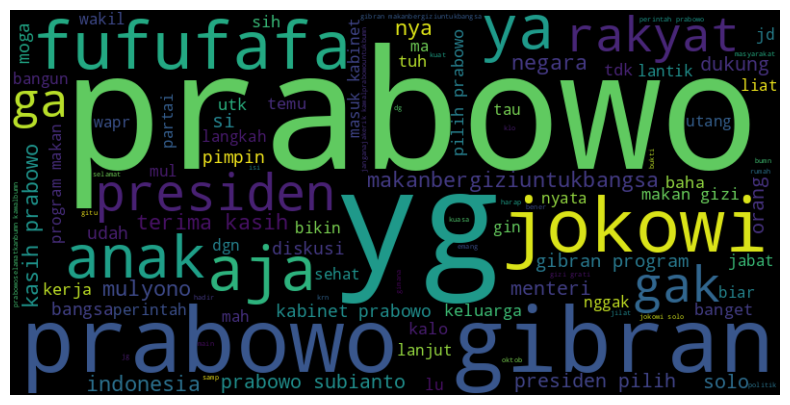

In [86]:
data_proses = pd.read_csv('data_proses.csv')


data_proses['Content'] = data_proses['Content'].apply(lambda x: str(x))
# Menampilkan wordcloud
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(data_proses['Content']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

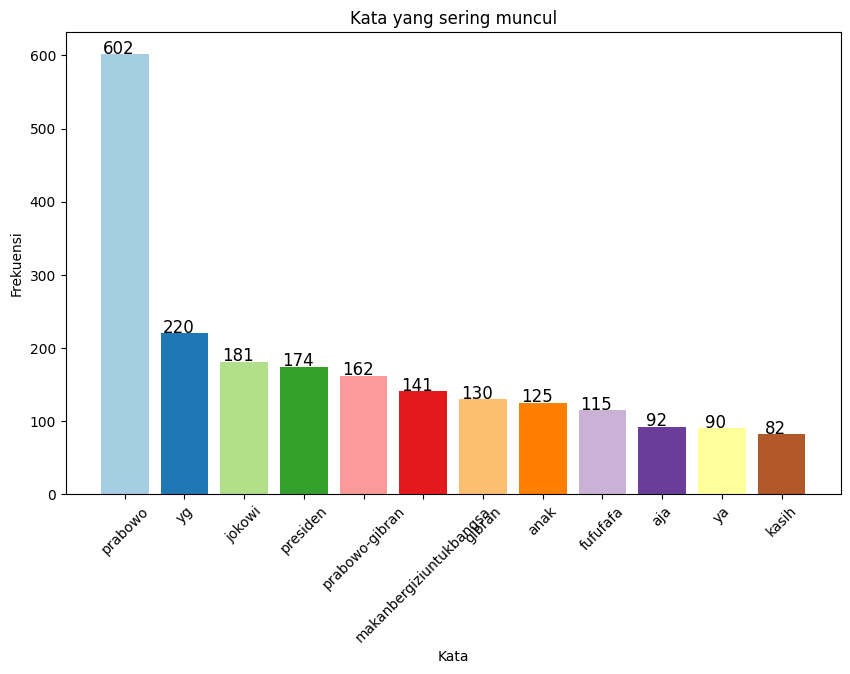

In [87]:
# Menampilkan kata yang sering muncul
text = ' '.join(data_proses['Content'])
words = text.split()
word_counts = Counter(words)
top_words = word_counts.most_common(12)
words, counts = zip(*top_words)
colors = plt.cm.Paired(range(len(words)))
plt.figure(figsize=(10, 6))
bars = plt.bar(words, counts, color=colors)

10

plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata yang sering muncul')
plt.xticks(rotation=45)
for bar, num in zip(bars, counts):
  plt.text(bar.get_x() + bar.get_width() / 2-0.1 ,num + 1, str(num), fontsize=12, color='black', ha='center')
plt.show()